In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
import ipyparams
from helper_functions import propagate_deflected_muons_custom, get_angle_deviation, energy_name, get_zenith_deflections_along_track, save_data_along_dict, load_data_along_dict

<IPython.core.display.Javascript object>

In [2]:
save_plot = True # False

currentNotebook = ipyparams.notebook_name[:len(ipyparams.notebook_name)-6] # get name of currect notebook
assert currentNotebook != '', "no notebook name, run cell again"

plot_dir = 'plots/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(plot_dir))

df_dir = 'data/{}/'.format(currentNotebook)
os.system('mkdir -p {}'.format(df_dir))

0

In [3]:
n_events = 10 # 1
E_i = 1e9 # 1 PeV (corresponds to MeV)
E_f = 1e6 # 1 TeV (corresponds to MeV)
E_i_final = np.ones(n_events) * E_i
E_f_final = np.ones(n_events) * E_f

table_path="/Users/pascalgutjahr/.cache/PROPOSAL" # lehrstuhl macbook

hdf_name = 'df_{}_{}_{}events.hdf'.format(energy_name(E_i), energy_name(E_f), n_events)
hdf_name

'df_1PeV_1TeV_10events.hdf'

# Propagation of default deflection parametrization

In [4]:
### run data
param_name = 'default'
deflection = ['tsaiapproximationbremsstrahlung', 
              'naivionization',
              'borogpetrukhinnuclearinteraction',
              'kelnerpairproduction']

tracks_default = propagate_deflected_muons_custom(E_i_final, E_f_final, deflection=deflection, table_path=table_path)

deflection = [] 
for track in tqdm(tracks_default):
    d = get_angle_deviation(track.track_directions()[0].spherical_coordinates[1], 
                            track.track_directions()[0].spherical_coordinates[2], 
                            track.track_directions()[-1].spherical_coordinates[1], 
                            track.track_directions()[-1].spherical_coordinates[2])
    deflection.append(np.rad2deg(d))

### save data
df = pd.DataFrame()
df['E_i'] = E_i_final / 1e3 # in GeV
df['E_f'] = [track.track_energies()[-1]/1e3 for track in tracks_default] # in GeV
df['total_deflection'] = deflection # in degree
df['track_distance'] = [track.track_propagated_distances()[-1]/100 for track in tracks_default] # in m
df.to_hdf(df_dir + hdf_name, key=param_name)    

Costum deflection
multiple scattering and stochastic deflection


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 26.91it/s]


In [46]:
### load data
param_name = 'default'
df_default = pd.read_hdf(df_dir + hdf_name, key=param_name)

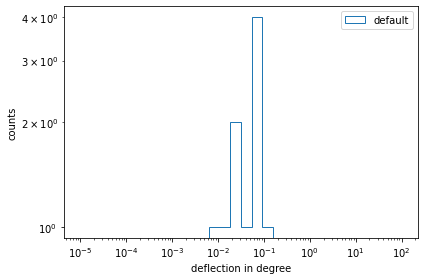

In [47]:
param_name = 'default'
bins = np.logspace(-5, 2, 31)
plt.hist(df_default['total_deflection'], bins=bins, histtype='step', label=param_name)
plt.xlabel('deflection in degree')
plt.ylabel('counts')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '1PeV_10TeV_{}events_{}.pdf'.format(n_events, param_name)) 

# Propagation of van Ginneken bremsstrahlung and nuclear interaction

In [48]:
### run data
param_name = 'brems_nuclint'
deflection = ['tsaiparametrizationbremsstrahlungginneken', 
              'naivionization',
              'bjorkennuclearinteraction',
              'kelnerpairproduction']

tracks_brems_nuclint = propagate_deflected_muons_custom(E_i_final, E_f_final, deflection=deflection, table_path=table_path)

deflection = [] 
for track in tqdm(tracks_brems_nuclint):
    d = get_angle_deviation(track.track_directions()[0].spherical_coordinates[1], track.track_directions()[0].spherical_coordinates[2], track.track_directions()[-1].spherical_coordinates[1], track.track_directions()[-1].spherical_coordinates[2])
    deflection.append(np.rad2deg(d))

    
### save data
df = pd.DataFrame()
df['E_i'] = E_i_final / 1e3 # in GeV
df['E_f'] = [track.track_energies()[-1]/1e3 for track in tracks_brems_nuclint] # in GeV
df['total_deflection'] = deflection # in degree
df['track_distance'] = [track.track_propagated_distances()[-1]/100 for track in tracks_brems_nuclint] # in m
df.to_hdf(df_dir + hdf_name, key=param_name) 

Costum deflection
multiple scattering and stochastic deflection


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 24.48it/s]


In [49]:
### load data
param_name = 'brems_nuclint'
df_brems_nuclint = pd.read_hdf(df_dir + hdf_name, key=param_name)

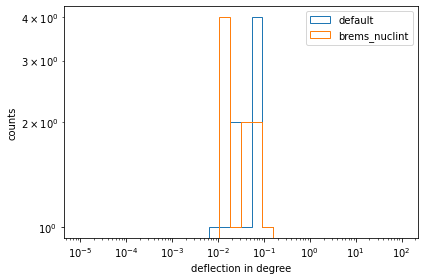

In [50]:
param_name = 'brems_nuclint'
bins = np.logspace(-5, 2, 31)
plt.hist(df_default['total_deflection'], bins=bins, histtype='step', label='default')
plt.hist(df_brems_nuclint['total_deflection'], bins=bins, histtype='step', label=param_name)
plt.xlabel('deflection in degree')
plt.ylabel('counts')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '1PeV_10TeV_{}events_{}.pdf'.format(n_events, param_name)) 

# Propagation of van Ginneken bremsstrahlung

In [77]:
### run data
param_name = 'brems'
deflection = ['tsaiparametrizationbremsstrahlungginneken', 
              'naivionization',
              'borogpetrukhinnuclearinteraction',
              'kelnerpairproduction']

tracks_brems = propagate_deflected_muons_custom(E_i_final, E_f_final, deflection=deflection, table_path=table_path)

deflection = [] 
for track in tqdm(tracks_brems):
    d = get_angle_deviation(track.track_directions()[0].spherical_coordinates[1], track.track_directions()[0].spherical_coordinates[2], track.track_directions()[-1].spherical_coordinates[1], track.track_directions()[-1].spherical_coordinates[2])
    deflection.append(np.rad2deg(d))

    
### save data
df = pd.DataFrame()
df['E_i'] = E_i_final / 1e3 # in GeV
df['E_f'] = [track.track_energies()[-1]/1e3 for track in tracks_brems_nuclint] # in GeV
df['total_deflection'] = deflection # in degree
df['track_distance'] = [track.track_propagated_distances()[-1]/100 for track in tracks_brems_nuclint] # in m
df.to_hdf(df_dir + hdf_name, key=param_name) 

Costum deflection
multiple scattering and stochastic deflection


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 19.64it/s]


In [78]:
### load data
param_name = 'brems'
df_brems = pd.read_hdf(df_dir + hdf_name, key=param_name)

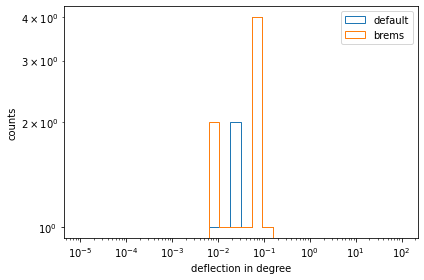

In [79]:
param_name = 'brems'
bins = np.logspace(-5, 2, 31)
plt.hist(df_default['total_deflection'], bins=bins, histtype='step', label='default')
plt.hist(df_brems['total_deflection'], bins=bins, histtype='step', label=param_name)
plt.xlabel('deflection in degree')
plt.ylabel('counts')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '1PeV_10TeV_{}events_{}.pdf'.format(n_events, param_name)) 

# Propagation of van Ginneken nuclear interaction

In [80]:
### run data
param_name = 'nuclint'
deflection = ['tsaiapproximationbremsstrahlung', 
              'naivionization',
              'bjorkennuclearinteraction',
              'kelnerpairproduction']

tracks_nuclint = propagate_deflected_muons_custom(E_i_final, E_f_final, deflection=deflection, table_path=table_path)

deflection = [] 
for track in tqdm(tracks_nuclint):
    d = get_angle_deviation(track.track_directions()[0].spherical_coordinates[1], track.track_directions()[0].spherical_coordinates[2], track.track_directions()[-1].spherical_coordinates[1], track.track_directions()[-1].spherical_coordinates[2])
    deflection.append(np.rad2deg(d))

    
### save data
df = pd.DataFrame()
df['E_i'] = E_i_final / 1e3 # in GeV
df['E_f'] = [track.track_energies()[-1]/1e3 for track in tracks_brems_nuclint] # in GeV
df['total_deflection'] = deflection # in degree
df['track_distance'] = [track.track_propagated_distances()[-1]/100 for track in tracks_brems_nuclint] # in m
df.to_hdf(df_dir + hdf_name, key=param_name) 

Costum deflection
multiple scattering and stochastic deflection


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 25.75it/s]


In [81]:
### load data
param_name = 'nuclint'
df_nuclint = pd.read_hdf(df_dir + hdf_name, key=param_name)

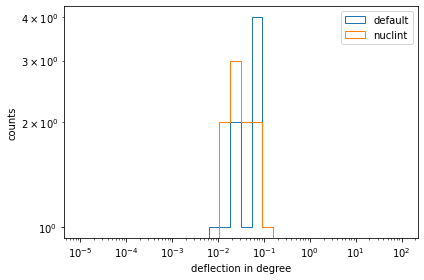

In [82]:
param_name = 'nuclint'
bins = np.logspace(-5, 2, 31)
plt.hist(df_default['total_deflection'], bins=bins, histtype='step', label='default')
plt.hist(df_nuclint['total_deflection'], bins=bins, histtype='step', label=param_name)
plt.xlabel('deflection in degree')
plt.ylabel('counts')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '1PeV_10TeV_{}events_{}.pdf'.format(n_events, param_name)) 

# Total comparison

In [ ]:
bins = np.logspace(-5, 2, 31)
plt.hist(df_default['total_deflection'], bins=bins, histtype='step', label='default')
plt.hist(df_brems_nuclint['total_deflection'], bins=bins, histtype='step', label='brems_nuclint')
plt.hist(df_brems['total_deflection'], bins=bins, histtype='step', label='brems')
plt.hist(df_nuclint['total_deflection'], bins=bins, histtype='step', label='nuclint')
plt.xlabel('deflection in degree')
plt.ylabel('counts')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '1PeV_10TeV_{}events_total_comparison.pdf'.format(n_events)) 

# Check deflections per interaction along the track 

In [60]:
dict_along = {}

## default

In [61]:
### run data
param_name = 'default'
dict_along.update(get_zenith_deflections_along_track(tracks_default, param_name))

### save data
save_data_along_dict(df_dir, hdf_name, dict_along)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:07<00:00,  1.28it/s]


In [62]:
### load data
param_name = 'default'
dict_along.update(load_data_along_dict(df_dir, hdf_name, param_name))

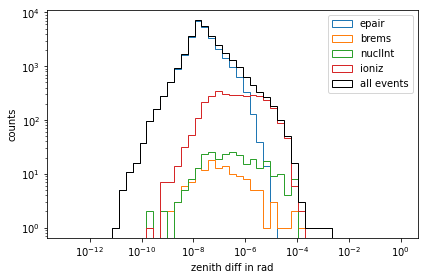

In [63]:
param_name = 'default'
types_reverse = {
            '-1': 'track length too short',
            '0': 'cont',
            '1': 'epair',
            '2': 'brems',
            '3': 'nuclInt',
            '4': 'ioniz',
            '5': 'decay'
    }

stoch_defl = dict_along['{}_along_defl_stoch'.format(param_name)]
stoch_types = dict_along['{}_along_defl_type'.format(param_name)][(dict_along['{}_along_defl_type'.format(param_name)]!=0)]
bins = np.logspace(-13, 0, 50)
for i,typ in enumerate(np.unique(stoch_types)):
    plt.hist(np.deg2rad(stoch_defl[stoch_types==typ]), \
             bins=bins, histtype='step', label=types_reverse[str(typ)])
plt.hist(np.deg2rad(dict_along['{}_along_defl_stoch'.format(param_name)]), color='black', histtype='step', bins=bins, label='all events')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('zenith diff in rad')
plt.ylabel('counts')
plt.legend()
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '1PeV_10TeV_defl_zenith_rad_diff_for_eacht_type_{}events_{}.pdf'.format(n_events, param_name)) 

7.794612498732714356e-07


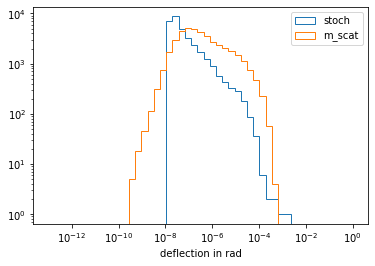

In [64]:
angles_stoch = dict_along['{}_along_defl_angle_stoch'.format(param_name)]
angles_cont = dict_along['{}_along_defl_angle_cont'.format(param_name)]
plt.hist(np.deg2rad(angles_stoch), bins=bins, histtype='step', label='stoch')
plt.hist(np.deg2rad(angles_cont), bins=bins, histtype='step', label='m_scat')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('deflection in rad')
plt.legend()
print(np.min(angles_stoch[angles_stoch!=0]))

## brems and nuclint

In [65]:
### run data
param_name = 'brems_nuclint'
dict_along.update(get_zenith_deflections_along_track(tracks_brems_nuclint, param_name))

### save data
save_data_along_dict(df_dir, hdf_name, dict_along)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.17it/s]


In [66]:
### load data
param_name = 'brems_nuclint'
dict_along.update(load_data_along_dict(df_dir, hdf_name, param_name))

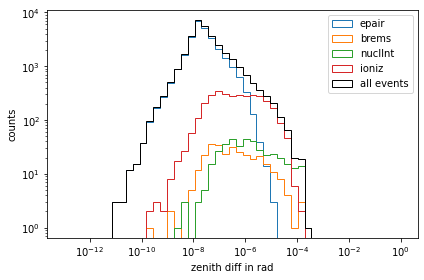

In [67]:
param_name = 'brems_nuclint'
types_reverse = {
            '-1': 'track length too short',
            '0': 'cont',
            '1': 'epair',
            '2': 'brems',
            '3': 'nuclInt',
            '4': 'ioniz',
            '5': 'decay'
    }

stoch_defl = dict_along['{}_along_defl_stoch'.format(param_name)]
stoch_types = dict_along['{}_along_defl_type'.format(param_name)][(dict_along['{}_along_defl_type'.format(param_name)]!=0)]
bins = np.logspace(-13, 0, 50)
for i,typ in enumerate(np.unique(stoch_types)):
    plt.hist(np.deg2rad(stoch_defl[stoch_types==typ]), \
             bins=bins, histtype='step', label=types_reverse[str(typ)])
plt.hist(np.deg2rad(dict_along['{}_along_defl_stoch'.format(param_name)]), color='black', histtype='step', bins=bins, label='all events')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('zenith diff in rad')
plt.ylabel('counts')
plt.legend()
plt.tight_layout()
if save_plot:
    plt.savefig(plot_dir + '1PeV_10TeV_defl_zenith_rad_diff_for_each_type_{}events_{}.pdf'.format(n_events, param_name)) 

7.796895296409050046e-07


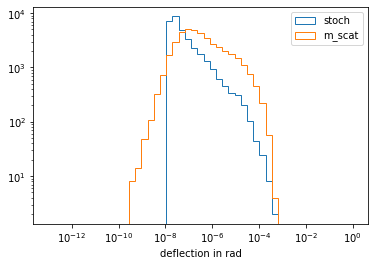

In [68]:
angles_stoch = dict_along['{}_along_defl_angle_stoch'.format(param_name)]
angles_cont = dict_along['{}_along_defl_angle_cont'.format(param_name)]
plt.hist(np.deg2rad(angles_stoch), bins=bins, histtype='step', label='stoch')
plt.hist(np.deg2rad(angles_cont), bins=bins, histtype='step', label='m_scat')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('deflection in rad')
plt.legend()
print(np.min(angles_stoch[angles_stoch!=0]))

## compare brems parametrization per interaction

default number of deflections:  299
ratio of not zero deflection:  0.44816053511705684
brems_nuclint number of deflections:  299
ratio of not zero deflection:  0.9933110367892977


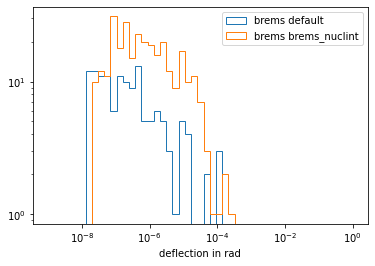

In [107]:
bins = np.logspace(-9, 0, 50)

param_name = 'default'
angles_stoch = dict_along['{}_along_defl_angle_stoch'.format(param_name)]
stoch_types = dict_along['{}_along_defl_type'.format(param_name)][(dict_along['{}_along_defl_type'.format(param_name)]!=0)]
typ = 2 # brems
plt.hist(np.deg2rad(angles_stoch[stoch_types==typ]), bins=bins, histtype='step', label=types_reverse[str(typ)] + ' ' + param_name)
print('{} number of deflections: '.format(param_name), len(angles_stoch[stoch_types==typ]))
print('ratio of not zero deflection: ', len(angles_stoch[stoch_types==typ][angles_stoch[stoch_types==typ]!=0]) / len(angles_stoch[stoch_types==typ]))


param_name = 'brems_nuclint'
angles_stoch = dict_along['{}_along_defl_angle_stoch'.format(param_name)]
stoch_types = dict_along['{}_along_defl_type'.format(param_name)][(dict_along['{}_along_defl_type'.format(param_name)]!=0)]
typ = 2 # brems
plt.hist(np.deg2rad(angles_stoch[stoch_types==typ]), bins=bins, histtype='step', label=types_reverse[str(typ)] + ' ' + param_name)
print('{} number of deflections: '.format(param_name), len(angles_stoch[stoch_types==typ]))
print('ratio of not zero deflection: ', len(angles_stoch[stoch_types==typ][angles_stoch[stoch_types==typ]!=0]) / len(angles_stoch[stoch_types==typ]))

plt.xscale('log')
plt.yscale('log')
plt.xlabel('deflection in rad')
plt.legend()

## compare nuclint parametrization per interaction

default number of deflections:  389
ratio of not zero deflection:  0.6966580976863753
brems_nuclint number of deflections:  389
ratio of not zero deflection:  1.0


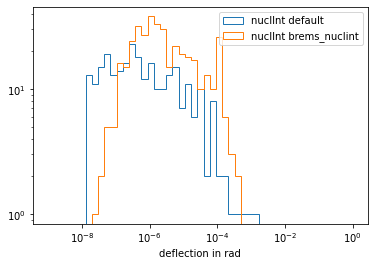

In [104]:
bins = np.logspace(-9, 0, 50)

param_name = 'default'
angles_stoch = dict_along['{}_along_defl_angle_stoch'.format(param_name)]
stoch_types = dict_along['{}_along_defl_type'.format(param_name)][(dict_along['{}_along_defl_type'.format(param_name)]!=0)]
typ = 3 # nuclint
plt.hist(np.deg2rad(angles_stoch[stoch_types==typ]), bins=bins, histtype='step', label=types_reverse[str(typ)] + ' ' + param_name)
print('{} number of deflections: '.format(param_name), len(angles_stoch[stoch_types==typ]))
print('ratio of not zero deflection: ', len(angles_stoch[stoch_types==typ][angles_stoch[stoch_types==typ]!=0]) / len(angles_stoch[stoch_types==typ]))


param_name = 'brems_nuclint'
angles_stoch = dict_along['{}_along_defl_angle_stoch'.format(param_name)]
stoch_types = dict_along['{}_along_defl_type'.format(param_name)][(dict_along['{}_along_defl_type'.format(param_name)]!=0)]
typ = 3 # nuclint
plt.hist(np.deg2rad(angles_stoch[stoch_types==typ]), bins=bins, histtype='step', label=types_reverse[str(typ)] + ' ' + param_name)
print('{} number of deflections: '.format(param_name), len(angles_stoch[stoch_types==typ]))
print('ratio of not zero deflection: ', len(angles_stoch[stoch_types==typ][angles_stoch[stoch_types==typ]!=0]) / len(angles_stoch[stoch_types==typ]))


plt.xscale('log')
plt.yscale('log')
plt.xlabel('deflection in rad')
plt.legend()